<a href="https://colab.research.google.com/github/cath19/DSPS_cHarty/blob/master/HW10/clusteringGenes_cHarty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Catherine Harty

HW 10

PHYS467

In [44]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv')

In [0]:
del genes['Unnamed: 0']

In [47]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [48]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

In [49]:
genes.shape

(4224, 74)

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [0]:
scaledgenes = skl.preprocessing.scale(genes)

In [51]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
from sklearn.manifold import TSNE

In [0]:
twodproj = TSNE(n_components=2).fit_transform(scaledgenes)

In [54]:
twodproj

array([[ -6.6036644, -23.447401 ],
       [ -6.4828625, -23.080772 ],
       [-13.276735 ,  -1.733946 ],
       ...,
       [-35.052273 , -20.615158 ],
       [-41.08239  , -31.98996  ],
       [-53.14973  ,  12.718323 ]], dtype=float32)

In [55]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


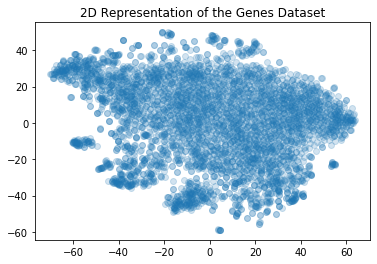

In [56]:
plt.scatter(twodproj[:,0], twodproj[:,1], alpha = 0.2);
plt.title('2D Representation of the Genes Dataset');

**Figure 1**: The is a two-dimensional image of a 74-dimensional dataset. This was done by using t-distributed stochastic neighbor embedding (TSNE).

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
def calICVar(X, labels):
  #Measures the intracluster variance
  icvar = 0
  for n in np.unique(labels):
    icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
  print(icvar)
  return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [0]:
from sklearn.cluster import KMeans

312576.00000000006
1 clusters:  variance = 312576
251076.64173410618
2 clusters:  variance = 251077
231187.35509465548
3 clusters:  variance = 231187
232166.0233257861
4 clusters:  variance = 232166
232204.76186750585
5 clusters:  variance = 232205
226452.42624453135
6 clusters:  variance = 226452
226644.13993309592
7 clusters:  variance = 226644
224771.5188319864
8 clusters:  variance = 224772
224128.93105652576
9 clusters:  variance = 224129


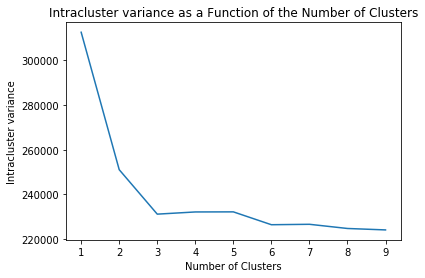

In [60]:
variances = []
for i in range(1, 10):
  results = skl.cluster.k_means(scaledgenes,i)
  variances.append([i, calICVar(scaledgenes, results[1])])
  print('%d clusters:  variance = %.f' % (variances[i - 1][0], variances[i - 1][1]))

variances = np.array(variances)

plt.plot(variances[:,0], variances[:,1])
plt.title('Intracluster variance as a Function of the Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Intracluster variance');

**Figure 2:** This plot shows the intracluster variance as a function of the number of clusters. The intracluster variance decreases as the number of clusters increases. This causes a dip in the graph around 3 which is the "elbow".

**Comment**: Since the elbow occurs when the number of clusters is equal to 3, this means that 3 is the best grouping size.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

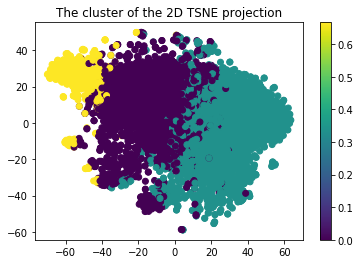

In [61]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
plt.title('The cluster of the 2D TSNE projection');

**Figure 3**: The is a two-dimensional image of a 74-dimensional dataset. This was done by using t-distributed stochastic neighbor embedding (TSNE). Each color represents a different cluster, therefore there are 3 clusters.

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
aggClusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(scaledgenes)
aggClusters.labels_

array([0, 0, 0, ..., 1, 0, 0])

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'distance (ward)')

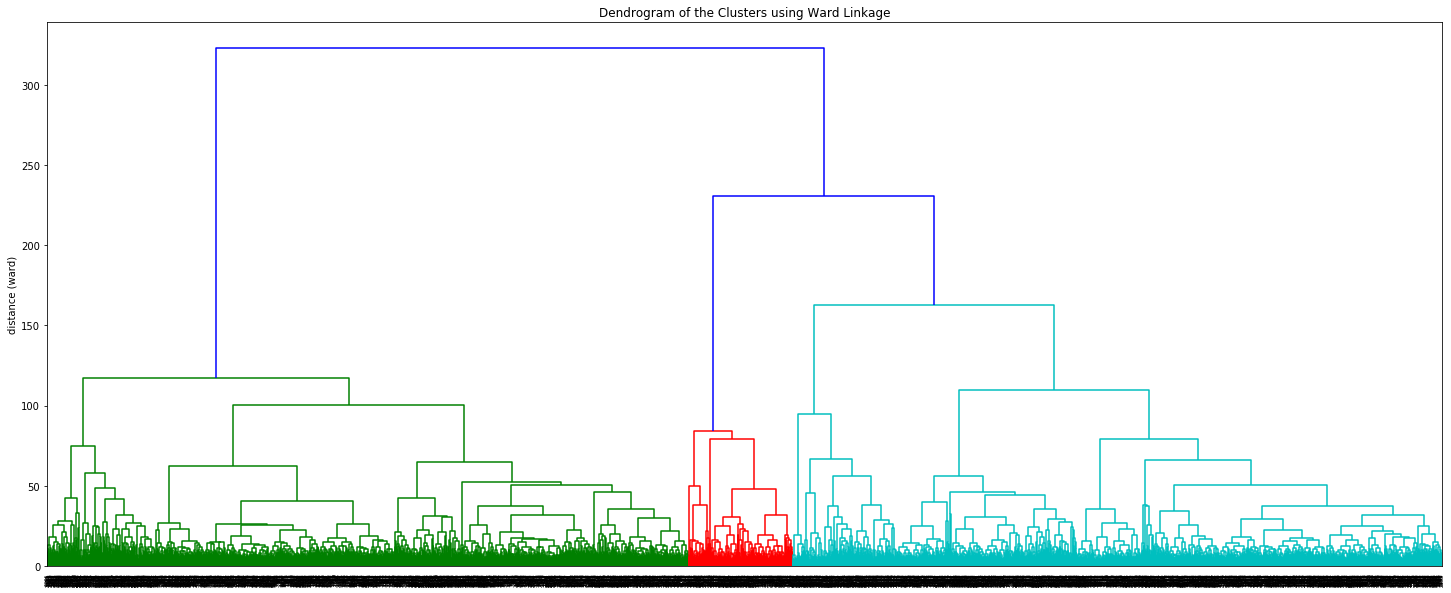

In [66]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram of the Clusters using Ward Linkage')
Z = linkage(scaledgenes, 'ward')
dendrogram(Z);
plt.ylabel('distance (ward)')

**Figure 4**: This is a dendrogram of the clusters using ward linkage. With this type of linkage, 3 distinct clusters were formed.

4b.3 repeat with a different linkage and comment on differences

Text(0, 0.5, 'distance (complete)')

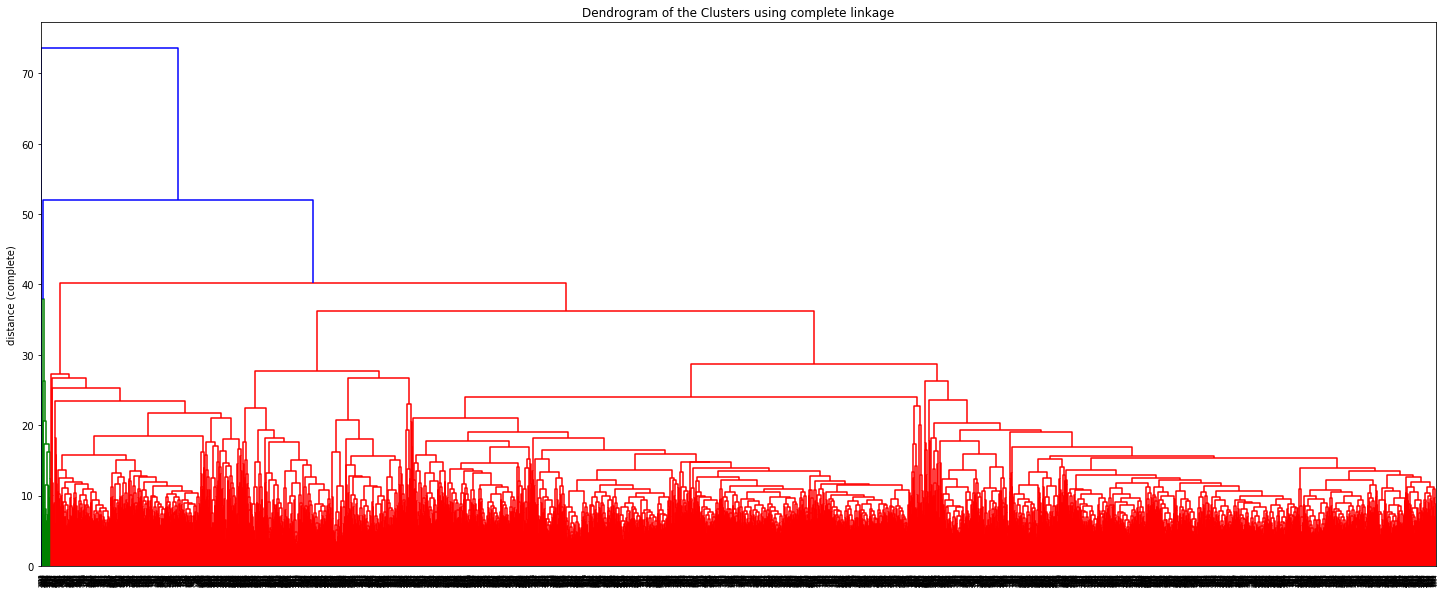

In [71]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram of the Clusters using complete linkage')
Z = linkage(scaledgenes, 'complete')
dendrogram(Z);
plt.ylabel('distance (complete)')

**Figure 5** This is a dendrogram of the clusters using complete linkage. The clusters are much harder too see with this type of linkage. The red cluster is the dominant cluster and the blue cluster is not even visible.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

312576.00000000006
1 clusters:  variance = 312576
265786.21130934544
2 clusters:  variance = 265786
240649.59622656365
3 clusters:  variance = 240650
240557.2366028278
4 clusters:  variance = 240557
239961.49171955144
5 clusters:  variance = 239961
235074.38528557075
6 clusters:  variance = 235074
234083.16084309437
7 clusters:  variance = 234083
232028.39531397203
8 clusters:  variance = 232028
228615.8484280025
9 clusters:  variance = 228616


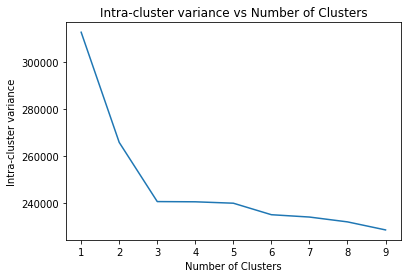

In [68]:
variances = []
for i in range(1,10):
  # Now using Agglomerative clustering to fit the data
  results = AgglomerativeClustering(n_clusters = i, linkage = 'ward').fit(scaledgenes)

  # K-means
  variances.append([i, calICVar(scaledgenes, results.labels_)])
  print('%d clusters:  variance = %.f' % (variances[i - 1][0], variances[i - 1][1]))

variances = np.array(variances)

plt.plot(variances[:,0], variances[:,1])
plt.title('Intra-cluster variance vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Intra-cluster variance');

**Figure 6**:

In [69]:
geneclustersAg = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(scaledgenes)
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

The cluster labels are [0 1 2]
The ideal number of clusters as decided by k-means is 3.


Text(0.5, 1.0, 'The cluster of the 2D TSNE projection')

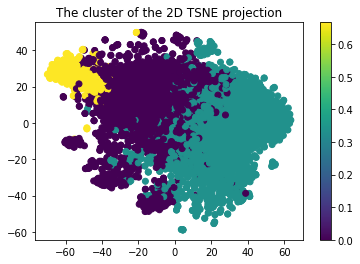

In [73]:
labels = np.unique(geneclustersAg.labels_)
print('The cluster labels are', labels)
print('The ideal number of clusters as decided by k-means is %d.' % len(labels))
plt.scatter(twodproj[:,0], twodproj[:,1], c = geneclustersAg.labels_/ geneclustersAg.n_clusters, alpha = 0.55)
plt.colorbar();
plt.title('The cluster of the 2D TSNE projection')

**Figure 7**:

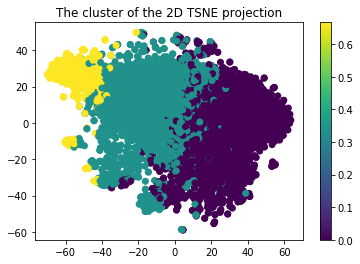

In [74]:
 geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
plt.title('The cluster of the 2D TSNE projection');

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
